# Ames Housing Notebook: 03A - Multi Linear Regression Model
***

### Importing basic packages w/ scikit learn - linear_model, model_selection & metrics packages

In [2226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

%matplotlib inline

### Reading in the cleaned train csv that was prepared in the 01_Cleaning notebook

In [2227]:
train_df = pd.read_csv('../datasets/train_clean.csv')

In [2228]:
train_df.head(2)

,Unnamed: 0,id_x,pid_x,ms_subclass_x,ms_zoning,lot_area_x,street,lot_shape,land_contour,utilities,...,paved_drive_Y,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,1
1,1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,1


### Upon examining the head, I realize that I need to drop the Unnamed 0 column

In [2229]:
train_df = train_df.drop(columns=['Unnamed: 0'])

## Creating features matrix (X) and target vector (y)

In [2230]:
features = ['overall_qual_x','gr_liv_area_x', 'garage_area_x', 'garage_cars_x', 
            'total_bsmt_sf_x', '1st_flr_sf_x', 'year_built_x', 'year_remod/add_x', 
            'full_bath_x', 'garage_yr_blt_x', 'mas_vnr_area_x', 'totrms_abvgrd_x', 
            'fireplaces_x', 'ms_subclass_x', 'open_porch_sf_x', 'wood_deck_sf_x', 
            'lot_area_x', 'bsmt_full_bath_x', 'half_bath_x', '2nd_flr_sf_x', 'bsmt_unf_sf_x',
            'bedroom_abvgr_x', 'screen_porch_x', 'overall_cond_x']

In [2231]:
X = train_df[features]
y = train_df['saleprice_x']

In [2232]:
X.shape

(2049, 24)

## Creating the Train Test Split Function

In [2233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)

## Instantiating and Fitting the Model with Linear Regression

In [2234]:
lr_full = LinearRegression() # instantiating model
lr_full.fit(X_train, y_train) # fitting the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluating model using Train score and K-Fold Cross Validation

In [2235]:
# Train score, default score is R2
train_full_r2 = lr_full.score(X_train, y_train)
train_full_r2

0.8690808199717474

In [2236]:
# Test score
test_full_r2 = lr_full.score(X_test, y_test)
test_full_r2

0.8803783314037719

In [2237]:
# Cross Val Score
cv_full_r2 = cross_val_score(lr_full, X_train, y_train, cv=5).mean()
cv_full_r2

0.8609728666964674

### Train and cross val R2 scores are around 0.86, whereas the test score is 0.88.  This means that our model is slightly underfit
***
### Evaluating RMSE scores for train and test.

In [2238]:
predictions_full_train = lr_full.predict(X_train)

In [2239]:
predictions_full_test = lr_full.predict(X_test)

In [2240]:
# RMSE
train_full_rmse = np.sqrt(mean_squared_error(y_train, predictions_full_train))
train_full_rmse

29222.926156267815

In [2241]:
# RMSE
test_full_rmse = np.sqrt(mean_squared_error(y_test, predictions_full_test))
test_full_rmse

25792.14448028733

### Train RMSE score was 29222, whereas test RMSE score was 25792.  Further evidence that the model is underfit.
***
### Want to get a sense of how my current model appears on a plot of predicted vs. actual values

## Plotting Predicted Values vs. Actual Values

In [2242]:
y_preds_full = lr_full.predict(X)

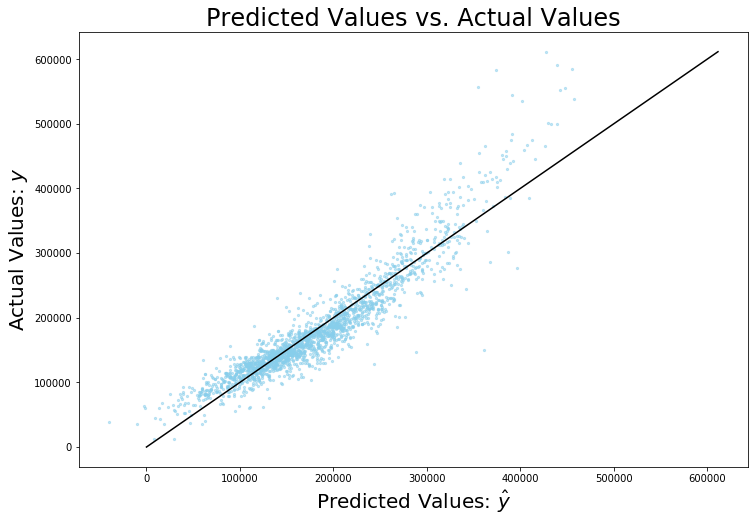

In [2243]:
# Plot the model
plt.figure(figsize=(12,8))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_preds_full, y, s=5, color='skyblue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

### It looks like the data forms an x^2 curve and the line is not fitting to the data in a linear fashion.
***
### Creating a new model with less features to see if it fits better

## Minimized Features Model
***
### Creating features matrix (X) and target vector (y)

In [2244]:
features_min= ['overall_qual_x','gr_liv_area_x', 'garage_area_x', 'garage_cars_x', 
            'total_bsmt_sf_x', '1st_flr_sf_x', 'year_built_x', 'year_remod/add_x', 
            'garage_yr_blt_x', 'totrms_abvgrd_x', 
            'fireplaces_x', 'ms_subclass_x', 'wood_deck_sf_x', 
            'lot_area_x', 'bsmt_full_bath_x', 'half_bath_x', '2nd_flr_sf_x', 'bsmt_unf_sf_x',
            'bedroom_abvgr_x', 'screen_porch_x', 'overall_cond_x']

In [2245]:
X = train_df[features_min]
y = train_df['saleprice_x']

In [2246]:
X.shape

(2049, 21)

### Creating the Train Test Split Function

In [2247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)

### Instantiating and Fitting the Model with Linear Regression

In [2248]:
lr_min = LinearRegression() # instantiating model
lr_min.fit(X_train, y_train) # fitting the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluating model using Train score and K-Fold Cross Validation

In [2249]:
# Train score, default score is R2
train_min_r2 = lr_min.score(X_train, y_train)
train_min_r2

0.8649809042558907

In [2250]:
# Test score
test_min_r2 = lr_min.score(X_test, y_test)
test_min_r2

0.8714269194271487

In [2251]:
# Cross Val Score
cv_min_2 = cross_val_score(lr_min, X_train, y_train, cv=5).mean()
cv_min_2

0.8582252253113897

### This model seems to be slightly less underfit than the previous model, but still not nearly as good of an R2 score as I would like to get
***
### Evaluating RMSE scores for train and test

In [2252]:
predictions_min_train = lr_min.predict(X_train)

In [2253]:
predictions_min_test = lr_min.predict(X_test)

In [2254]:
# RMSE
train_min_rmse = np.sqrt(mean_squared_error(y_train, predictions_min_train))
train_min_rmse

29676.97698521587

In [2255]:
# RMSE
test_min_rmse = np.sqrt(mean_squared_error(y_test, predictions_min_test))
test_min_rmse

26739.762752971157

### Slightly better than the previous model, but I know we can do better
***
### Plotting the predicted vs. actual values of the minimized features model

In [2256]:
y_preds_min = lr_min.predict(X)

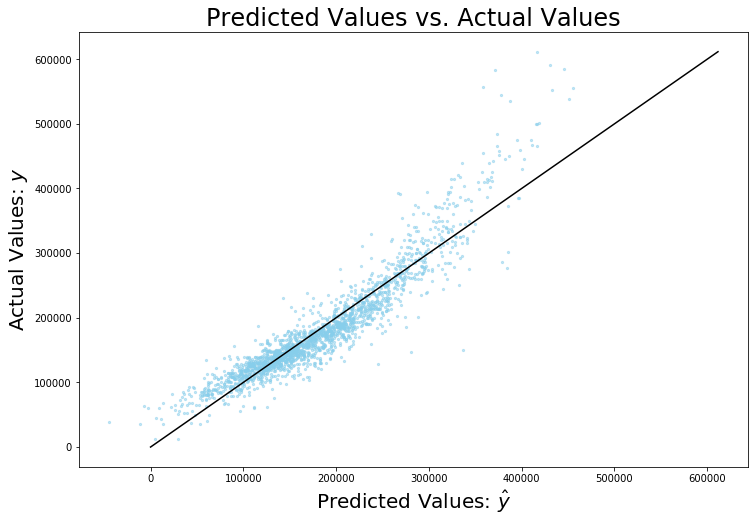

In [2257]:
# Plot the model
plt.figure(figsize=(12,8))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_preds_min, y, s=5, color='skyblue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

### Not so enthusiastic about this plot.  Like the last plot, as sale price increases the model gets increasingly worse at making good predictions.  There is clearly heteroscedasticity.
***
### Going to try using the y_log method on y_train, and y_test

## Y_train_log, Y_test_log Model with Features

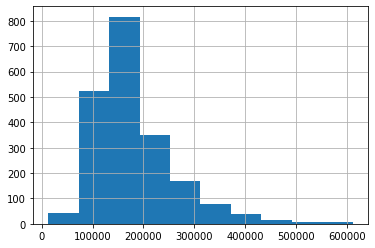

In [2258]:
train_df['saleprice_x'].hist()

### The plot above is a histogram of the model before the appropriation of log.  We can see a right skew.
***
### Below is the same plot after applying np.log to our y variable, saleprice

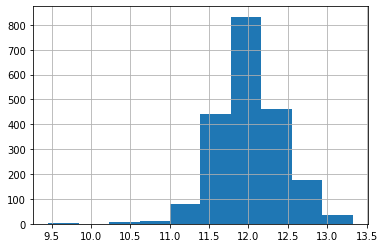

In [2261]:
train_df['saleprice_x'].map(np.log).hist()

### The distribution appears to have been normalized
***
### Creating features matrix (X) and target vector (y).map(np.log)

In [2322]:
X = train_df[features]
y = train_df['saleprice_y'].map(np.log)

In [2323]:
train_df['saleprice_x'].max()

611657

### Creating the Train Test Split Function

In [2324]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, random_state=15)

In [2325]:
#y_train_log = y_train.map(np.log)
#y_test_log = y_test.map(np.log)

### Instantiating and Fitting the Model with Linear Regression

In [2326]:
lr_log = LinearRegression() # instantiating model

In [2327]:
lr_log.fit(X_train, y_train) # fitting the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluating model using Train score and K-Fold Cross Validation

In [2328]:
# Train score, default score is R2
train_log_r2 = lr_log.score(X_train, y_train)
train_log_r2

0.8904781498799405

In [2329]:
# Test score
test_log_r2 = lr_log.score(X_test, y_test)
test_log_r2

0.9071089306977916

In [2330]:
cv_log_r2 = cross_val_score(lr_log, X_train, y_train, cv=5).mean()
cv_log_r2

0.8851921839250643

### Improvement in R2 score for the log model, still slightly undefit, but the degree is less now
***
### Evaluating RMSE scores for train and test

In [2331]:
predictions_log_train = lr_log.predict(X_train)

In [2332]:
predictions_log_test = lr_log.predict(X_test)

In [2333]:
predictions_in_original_units_train = np.exp(predictions_log_train)

In [2334]:
predictions_in_original_units_test = np.exp(predictions_log_test)

In [2335]:
# RMSE
train_log_rmse = np.sqrt(mean_squared_error(y_train, predictions_in_original_units_train))
train_log_rmse

197099.32650640002

In [2342]:
# RMSE
test_log_rmse = np.sqrt(mean_squared_error(y_test, predictions_in_original_units_test))
test_log_rmse

191468.59749212302

### My understanding is that log creates RMSE values that are beyond what we would expect, so we cannot use the log model rmse value as a score to assess by.
***
### Going to plot predicted vs. actual values of y for the log model

In [2343]:
y_preds_log = lr_log.predict(X)

In [2344]:
y_preds_log.shape

(2049,)

In [2345]:
y_preds_log.max()

13.317895296247034

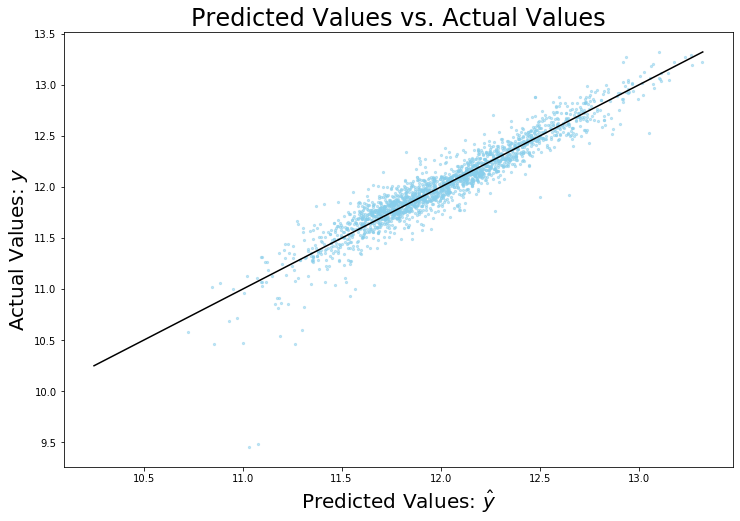

In [2346]:
# Plot the model
plt.figure(figsize=(12,8))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_preds_log, y, s=5, color='skyblue', alpha = 0.5)

# Plot a line.
plt.plot([10.25, np.max(y)],
         [10.25, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

### Beautiful plot, very linear.  Of the 3 plots in this notebook, this is by far the best.

***
### Creating a table to display model comparison values for train R2, test R2, train RMSE, and test RMSE of the the 3 versions of my model thus far.

In [ ]:
#table = pd.read_csv('../datasets/model_comparisons_table.csv', index_col = [0])

In [ ]:
#table = table.drop('log_full_features_MLR', axis=1)
table

In [ ]:
#table['log_full_features_MLR'] = [train_log_r2, test_log_r2, train_log_rmse, test_log_rmse]

### Saving table as a csv to open up in lasso and ridge models

In [ ]:
#table.to_csv('../datasets/model_comparisons_table.csv')

## Stats Model Summary for Log Model

In [2348]:
X['intercept'] = 1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [2349]:
import statsmodels.api as sm
model = sm.OLS(y,X).fit()

In [2350]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            saleprice_y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     719.2
Date:                Sun, 19 Jan 2020   Prob (F-statistic):               0.00
Time:                        23:25:24   Log-Likelihood:                 1221.9
No. Observations:                2049   AIC:                            -2394.
Df Residuals:                    2024   BIC:                            -2253.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
overall_qual_x       0.0876      0.004     23.814      0.000       0.080       0.095
gr_liv_area_x        0.0002   6.07e-05      2.677      0.007    4.34e-05       0.000
garage_area_x     6.357e-05   3.37e-05      1.886      0.059   -2.52e-06       0.000
garage_cars_x        0.0242      0.010      2.523      0.012       0.005       0.043
total_bsmt_sf_x      0.0002   1.46e-05     12.741      0.000       0.000       0.000
1st_flr_sf_x         0.0001   6.17e-05      1.709      0.088   -1.56e-05       0.000
year_built_x         0.0031      0.000     15.384      0.000       0.003       0.004
year_remod/add_x     0.0011      0.000      4.994      0.000       0.001       0.002
full_bath_x         -0.0023      0.009     -0.258      0.796      -0.020       0.015
garage_yr_blt_x      0.0003      0.000      1.496      0.135   -9.92e-05       0.001
mas_vnr_area_x    5.625e-06   2.02e-05      0.278      0.781    -3.4e-05    4.52e-05
totrms_abvgrd_x      0.0070      0.004      1.818      0.069      -0.001       0.014
fireplaces_x         0.0366      0.006      6.328      0.000       0.025       0.048
ms_subclass_x       -0.0005   7.98e-05     -5.743      0.000      -0.001      -0.000
open_porch_sf_x   2.818e-05   4.93e-05      0.572      0.567   -6.84e-05       0.000
wood_deck_sf_x    3.498e-05   2.54e-05      1.377      0.169   -1.48e-05    8.48e-05
lot_area_x        3.759e-06   5.13e-07      7.321      0.000    2.75e-06    4.77e-06
bsmt_full_bath_x     0.0265      0.008      3.315      0.001       0.011       0.042
half_bath_x         -0.0069      0.009     -0.795      0.427      -0.024       0.010
2nd_flr_sf_x         0.0001   6.08e-05      1.763      0.078    -1.2e-05       0.000
bsmt_unf_sf_x    -7.652e-05   1.02e-05     -7.510      0.000   -9.65e-05   -5.65e-05
bedroom_abvgr_x     -0.0096      0.005     -1.775      0.076      -0.020       0.001
screen_porch_x       0.0003   5.36e-05      5.241      0.000       0.000       0.000
overall_cond_x       0.0530      0.003     15.909      0.000       0.046       0.060
intercept            1.4256      0.433      3.293      0.001       0.576       2.275
==============================================================================
Omnibus:                     1223.974   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46358.362
Skew:                          -2.202   Prob(JB):                         0.00
Kurtosis:                      25.882   Cond. No.                     1.83e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+06. This might indicate that there are
strong multicollinearity or other numerical pr

### Creating a featues dataframe with my x-variables to use for the ridge and lasso models

In [ ]:
poly =      ['overall_qual_x','gr_liv_area_x', 'garage_area_x', 'garage_cars_x', 
            'total_bsmt_sf_x', '1st_flr_sf_x', 'year_built_x', 'year_remod/add_x', 
            'full_bath_x', 'garage_yr_blt_x', 'mas_vnr_area_x', 'totrms_abvgrd_x', 
            'fireplaces_x', 'ms_subclass_x', 'open_porch_sf_x', 'wood_deck_sf_x', 
            'lot_area_x', 'bsmt_full_bath_x', 'half_bath_x', '2nd_flr_sf_x', 'bsmt_unf_sf_x',
            'bedroom_abvgr_x', 'screen_porch_x', 'overall_cond_x', 'saleprice_x']

In [ ]:
poly_df = train_df[poly]

In [ ]:
poly_df.to_csv('../datasets/polynomials_df.csv')